In [75]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


df=pd.read_csv('./data/051910.csv',index_col=0)
code_name=pd.read_csv('./data/code_name.csv')
train=df[['open','high','low','volume']]
target=df[['close']]

In [76]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train)
train_data_normalized = np.array(train_data_normalized)

test_data_normalized = scaler.fit_transform(target)
test_data_normalized = np.array(test_data_normalized)[1:]

In [77]:
seq_data=[]
target_data=[]
window_size=7
n_ins=train_data_normalized.shape[0]//window_size
for i in range(train_data_normalized.shape[0]-window_size):
    L=train_data_normalized[i:i+window_size]
    L_t=test_data_normalized[i:i+window_size]
    seq_data.append(L)
    target_data.append(L_t)

In [78]:
class stock_net(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        
        super(stock_net, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.h_o=nn.Linear(hidden_dim,1)
        
    def forward(self,x):
        
        x=self.lstm(x)
        x=self.h_o(x[0])
        
        return x

In [79]:
seq_data=np.array(seq_data)
target_data=np.array(target_data)
emb_dim=seq_data.shape[2] # feature size

In [80]:
haha_net=stock_net(emb_dim,5)
criterion = nn.MSELoss()
# Optimizer를 생성합니다.
optimizer = optim.SGD(haha_net.parameters(), lr=0.01)

In [85]:
Loss=[]
for i in range(seq_data.shape[0]):
    optimizer.zero_grad()
    output=haha_net(torch.FloatTensor(seq_data[i]).view(1,7,4))
    loss = criterion(output, torch.FloatTensor(target_data[i]))
    loss.backward()
    optimizer.step()  
    if i%100==0:
        Loss.append(loss)

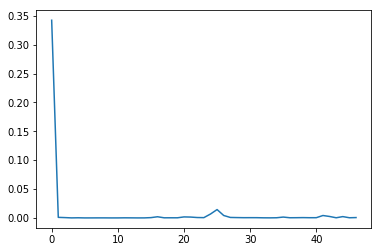

In [87]:
import matplotlib.pyplot as plt

plt.plot(Loss)